# 복습문제

<1> BOW의 Feature Vectorizer 두 가지
- 카운트 기반
- TF-IDF

<2> 영어를 쓰세요
- 말뭉치 : Corpus
- 어간 추출 : Stemming
- 표제어 추출 : Lemmatization

<3> 토큰화 두 가지
- 단어, 문장

<4> BOW 모델은 문서가 가지는 모든 단어를 문맥이나 순서를 무시한다
- O

<5> 텍스트를 피처 벡터화한다. -> 워드 임베딩(Word Embedding) 두 가지 방법
- BOW
- word2vec

<6> is, the, a 등 문장을 구성하는 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어
- 불용어(Stop Words)

<7> stemmer.stem('working') 이것의 출력물을 예측하시오.
- work

<8> 희소행렬을 압축해서 저장하는 두 가지 방법 :
- COO 
- CSR

<9> 연속된 n개의 단어를 하나의 토큰화 단위로 분리:
- n-gram

<10> 카운트 벡터화를 위해 CountVectorizer() 사용하기 전에 반드시 텍스트 전처리를 해야 한다
- X : CountVectorizer 함수에는 소문자 일괄 변화, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리 기능도 포함

In [9]:
## <11> 
import numpy as np

dense = np.array([[0,1,0,3],
                  [1,2,0,0],
                  [0,0,1,0],
                  [0,2,0,0]]) 

In [10]:
# COO
from scipy import sparse

data = [1, 3, 1, 2, 1, 2]
row = [0, 0, 1, 1, 2, 3]
col = [1, 3, 0, 1, 2, 1]

sparse.coo_matrix((data, (row, col))).toarray()

array([[0, 1, 0, 3],
       [1, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 2, 0, 0]])

In [11]:
# CSR
data = [1, 3, 1, 2, 1, 2]
row_index = np.array([0, 2, 4, 5, 6])
col = [1, 3, 0, 1, 2, 1]

sparse.csr_matrix((data, col, row_index)).toarray()

array([[0, 1, 0, 3],
       [1, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 2, 0, 0]])

<12> 전처리
- 클렌징
- 토큰화
- 스톱워드 제거/필터링/철자 수정
- Stemming/Lemmatization

In [12]:
## <13> 
text = 'I decided, very early on, just to accept life unconditionally. I never expected it to do anything special for me, yet I seemed to accomplish far more than I had ever hoped.Most of the time it just happened to me without my ever seeking it.' 
text

'I decided, very early on, just to accept life unconditionally. I never expected it to do anything special for me, yet I seemed to accomplish far more than I had ever hoped.Most of the time it just happened to me without my ever seeking it.'

In [24]:
# 위 문장에서 스톱 워드 제거하기(특수 문자 제거하고 토큰화 후 제거)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
import re

text1 = re.sub('[^a-zA-Z]', ' ', text)
text1

from nltk import word_tokenize, sent_tokenize

def tokenize_text(text):
    sentences = sent_tokenize(text)
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

word_tokens = tokenize_text(text1)
word_tokens

[['I',
  'decided',
  'very',
  'early',
  'on',
  'just',
  'to',
  'accept',
  'life',
  'unconditionally',
  'I',
  'never',
  'expected',
  'it',
  'to',
  'do',
  'anything',
  'special',
  'for',
  'me',
  'yet',
  'I',
  'seemed',
  'to',
  'accomplish',
  'far',
  'more',
  'than',
  'I',
  'had',
  'ever',
  'hoped',
  'Most',
  'of',
  'the',
  'time',
  'it',
  'just',
  'happened',
  'to',
  'me',
  'without',
  'my',
  'ever',
  'seeking',
  'it']]

In [26]:
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

for sentence in word_tokens:
    filtered_words = []
    for word in sentence:
        word = word.lower()
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['decided', 'early', 'accept', 'life', 'unconditionally', 'never', 'expected', 'anything', 'special', 'yet', 'seemed', 'accomplish', 'far', 'ever', 'hoped', 'time', 'happened', 'without', 'ever', 'seeking']]


# 수업

## 비지도학습 기반 감성 분석 소개

- lexicon : 감성 사전
- Sematic : 문맥상, 의미상 의미

WordNet
- 다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틱 정보를 제공하며, 이를 위해 각각 품사로 구성된 개별 단어를 Synset이라는 개념을 이용해 표현함
- Synset은 단순한 하나의 단어가 아니라 그 단어가 가지는 문맥, 시맨택 정보를 제공하는 WordNet의 핵심개념

NLTK의 감성 사전의 한계로 다른 감성 사전을 이용하는 것이 일반적임
- SentiWordNet : WordNet을 구현한 것으로 WordNet의 Synset 개념을 감성 분석에 적용한 것
- VADER : 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공항기 위한 패키지
- Pattern : 예측 성능 측면에서 가장 주목받는 패키지임

### SentiWordNet을 이용한 감성 분석

In [27]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

True

In [68]:
# present 단어에 대한 Synset 추출
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성
synsets = wn.synsets(term)
print('synset() 반환 type : ', type(synsets))
print('synset() 반환 값 개수 : ', len(synsets))
print('synset() 반환 값 : ', synsets)

synset() 반환 type :  <class 'list'>
synset() 반환 값 개수 :  18
synset() 반환 값 :  [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


- synset 객체가 가지는 여러 가지 속성 : POS(품사), 정의(Definition), 부명제(Lemma) 등으로 시맨틱적인 요소를 표현할 수 있음

In [71]:
for synset in synsets:
    print('##### Synset name : ', synset.name(), '#####')
    print('POS : ', synset.lexname())
    print('Definition : ', synset.definition())
    print('Lemmas : ', synset.lemma_names())

##### Synset name :  present.n.01 #####
POS :  noun.time
Definition :  the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas :  ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS :  noun.possession
Definition :  something presented as a gift
Lemmas :  ['present']
##### Synset name :  present.n.03 #####
POS :  noun.communication
Definition :  a verb tense that expresses actions or states at the time of speaking
Lemmas :  ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS :  verb.perception
Definition :  give an exhibition of to an interested audience
Lemmas :  ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS :  verb.communication
Definition :  bring forward and present to the mind
Lemmas :  ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS :  verb.creation
Definition :  perform (a play), especially on a stage
Lemmas :  

- WordNet은 어떤 어휘와 다른 어휘 간의 관계를 유사도로 나타낼 수 있음
- path_similarity()

In [76]:
# synset 객체를 단어별로 생성
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]  ### entity.name()의 outputdms tree.n.01, lion.n.01, tiger.n.02, cat.n.01, dog.n.01임

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장
similarity_df = pd.DataFrame(similarities, columns = entity_names, index = entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


- lion은 tree와의 유사도가 0.07로 가장 작고, tiger와는 유사도가 0.33으로 가장 큼

In [78]:
##### SentiWordNet은 WordNet의 Synset과 유사한 Senti_Synset 클래스를 가지고 있음
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type : ', type(senti_synsets))
print('senti_synsets() 반환 값 개수 : ', len(senti_synsets))
print('senti_synsets() 반환 값 : ', senti_synsets)

senti_synsets() 반환 type :  <class 'list'>
senti_synsets() 반환 값 개수 :  11
senti_synsets() 반환 값 :  [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


Sentisynset 객체는 단어의 감성을 나타내는 감성 지수와 객관성(감성과 반대)을 나타내는 객관성 지수를 갖고있음
- 감성 지수 -> 긍정 감성 지수와 부정 감성 지수로 나뉨
- 어떤 단어가 전혀 감성적이지 않으면 객관성 지수는 1이 되고, 감성 지수는 모두 0이 됨

In [81]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')

print('father 긍정감성 지수 : ', father.pos_score())
print('father 부정감성 지수 : ', father.neg_score())
print('father 객관성 지수 : ', father.obj_score())
print('\n')

fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수 : ', fabulous.pos_score())
print('fabulous 부정감성 지수 : ', fabulous.neg_score())

father 긍정감성 지수 :  0.0
father 부정감성 지수 :  0.0
father 객관성 지수 :  1.0


fabulous 긍정감성 지수 :  0.875
fabulous 부정감성 지수 :  0.125


**SentiwordNet을 이용한 영화 감상평 감성 분석**

In [85]:
import pandas as pd

review_df = pd.read_csv('./data/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3) 

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


영화 감상평 감성 분석을 SentiWordNet Lexicon 기반으로 수행해보겠음

<수행 순서>
1. 문서(Document)를 문장(Sentence) 단위로 분해
2. 다시 문장을 단어(Word) 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
4. Senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정

SentiWordNet을 이용하기 위해서 WordNet을 이용해 문서를 다시 단어로 토큰화한 뒤 어근 추출(Lemmatization)과 품사 태깅(POS Tagging)을 적용해야 함

In [82]:
## 품사 태깅하는 내부 함수 생성
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB

문장 -> 단어토큰 -> 품사태깅 후에 SentiSynset 클래스를 생성하고 Polarity Score를 합산하는 함수를 생성

In [108]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:
            
            # WorNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos = wn_tag)
            if not lemma:
                continue
            
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성
            synsets = wn.synsets(lemma, pos = wn_tag)
            if not synsets:
                continue
            
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1
            
        if not tokens_count:
            return 0
        
        # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
        if sentiment >= 0:
            return 1
    return 0

In [111]:
review_df1 =  pd.read_csv('./data/labeledTrainData.tsv', header=0, sep="\t", quoting=3)[:500]
review_df1

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
...,...,...,...
495,"""11456_10""",1,"""Andy Goldsworthy is a taoist master of the fi..."
496,"""654_10""",1,"""In what could have been seen as a coup toward..."
497,"""988_1""",0,"""This movie offers NOTHING to anyone. It doesn..."
498,"""7290_3""",0,"""What a long, drawn-out, pointless movie. I'm ..."


In [112]:
### swn_polarity()함수를 호출해 감성 분석 수행
review_df1['preds'] = review_df1['review'].apply(lambda x: swn_polarity(x))
y_target = review_df1['sentiment'].values
preds = review_df1['preds'].values

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print('정확도 : ', accuracy_score(y_target, preds))
print('정밀도 : ', precision_score(y_target, preds))
print('재현율 : ', recall_score(y_target, preds))

[[ 73 194]
 [ 26 207]]
정확도 :  0.56
정밀도 :  0.516209476309227
재현율 :  0.8884120171673819


### VADER를 이용한 감성 분석

- VADER는 소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon

In [116]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df1['review'][0]) ## 감상평 한 개만
print(senti_scores)

{'neg': 0.13, 'neu': 0.744, 'pos': 0.126, 'compound': -0.8278}


- neg : 부정 감성 지수
- neu : 중립적인 감성 지수
- pos : 긍정 감성 지수
- compound : neg, neu, pos를 적절히 조합해 -1에서 1 사이의 감성 지수를 표현

<VADER 분석>
1. SentimentIntensityAnalyzer 객체 생성
2. 문서별로 polarity_scores() 메서드 호출해 감성 점수 구함
3. 해당 문서의 감성 점수가 특정 임계값 이상이면 긍정, 그렇지 않으면 부정으로 판단

In [118]:
### VADER 예측 성능 측정
def vader_polarity(review, threshold = 0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df1['vader_preds'] = review_df1['review'].apply(lambda x: vader_polarity(x, 0.1))
y_target = review_df1['sentiment'].values
vader_preds = review_df1['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print('정확도 : ', accuracy_score(y_target, vader_preds))
print('정밀도 : ', precision_score(y_target, vader_preds))
print('재현율 : ', recall_score(y_target, vader_preds))

[[155 112]
 [ 42 191]]
정확도 :  0.692
정밀도 :  0.6303630363036303
재현율 :  0.8197424892703863


- 정확도와 재현율이 SentiWordNet보다 향상됨

## 토픽 모델링(Topic Modeling) - 20 뉴스그룹

토픽 모델링(Topic Modeling)이란 문서 집합에 숨어있는 주제를 찾아내는 것
- 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출함

머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 LSA(Latent Semantic Analysis)와 LDA(Latent Dirichlet Allocation)임
- 앞서 차원 축소의 LDA(Linear Discriminant Analysis)와는 다른 알고리즘이므로 주의하기


먼저 LDA 토픽 모델링을 위해 fetch_20newsgroups() API는 categories 파라미터를 통해 필요한 주제만 필터링해 추출하고 추출된 텍스트를 Count 기반으로 벡터화 변환하기

In [120]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset = 'all', remove = ('headers', 'footers', 'quotes'), categories = cats, random_state = 0)

# LDA는 Count 기반의 벡터화만 적용
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2, stop_words = 'english', ngram_range = (1, 2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CounterVectorizer Shape : ', feat_vect.shape)

CounterVectorizer Shape :  (7862, 1000)


- CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터임
- 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행함
- LatentDirichletAllocation 클래스의 n_components 파라미터를 이용해 이 토픽 개수를 조정함

In [121]:
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [123]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

- components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가짐
- 위에서는 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있음

In [124]:
# display_topics() 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word 나열해보기
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        
        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
        topic_word_indexes = topic.argsort()[::-1]  ## argsort()는 sorting 후 인덱스를 반환함
        top_indexes = topic_word_indexes[:no_top_words]
        
        # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 문서 군집화 소개와 실습(Opinion Review 데이터 세트)

문서 군집화(Document Clustering)는 비슷한 텍스트 구성의 문서를 군집화(Clutering)하는 것
- 비지도학습 기반으로 동작함

### Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

In [130]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'.\data\OpinosisDataset'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text': opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...


In [133]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens) 

In [134]:
# 문서를 TF-IDF 형태로 피처 벡터화하기
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english', ngram_range = (1, 2), min_df = 0.05, max_df = 0.85)

# opinion_text 칼럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [135]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state = 0
km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [136]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,2
1,bathroom_bestwestern_hotel_sfo,...,0
2,battery-life_amazon_kindle,...,1
3,battery-life_ipod_nano_8gb,...,1
4,battery-life_netbook_1005ha,...,1


In [137]:
document_df[document_df['cluster_label'] == 0].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,...,0
32,room_holiday_inn_london,...,0
30,rooms_bestwestern_hotel_sfo,...,0
31,rooms_swissotel_chicago,...,0


In [138]:
# 개별 군집별로 요약된 결과
from sklearn.cluster import KMeans

# 3개 집합으로 군집화
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# 소속 클러스터를 cluster_label 칼럼으로 할당하고 cluster_label 값으로 결정
document_df['cluter_label'] = cluster_label
document_df.sort_values(by = 'cluster_label')

,filename,opinion_text,cluster_label,cluter_label
1,bathroom_bestwestern_hotel_sfo,...,0,2
30,rooms_bestwestern_hotel_sfo,...,0,2
31,rooms_swissotel_chicago,...,0,2
32,room_holiday_inn_london,...,0,2
2,battery-life_amazon_kindle,...,1,0
3,battery-life_ipod_nano_8gb,...,1,0
4,battery-life_netbook_1005ha,...,1,0
44,speed_windows7,...,1,0
26,performance_netbook_1005ha,...,1,0
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,1,0


### 군집별 핵심 단어 추출하기

- KMeans 객체는 각 군집을 구성하는 단어 피처가 군집의 중심(Centroid)을 기준으로 얼마나 가깝게 위치해 있는지 clusters_centers_ 라는 속성으로 제공함
- clusters_centers_는 배열 값으로 제공되며, 행은 개별 군집을, 열은 개별 피처를 의미함

In [140]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape : ', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape :  (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


- 군집이 3개, word 피처가 4611개로 구성됨
- 각 행의 배열값은 각 군집 내의 4611개 피처의 위치가 개별 중심과 얼마나 가까운가를 상대 값으로 나타낸 것
- 0에서 1까지의 값을 가질 수 있으며 1에 가까울수록 중심과 가까운 값을 의미함

In [151]:
#### cluster_centers_ 속성값을 이용해 각 군집별 핵심 단어를 찾아보기
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features = 10):
    cluster_details = {}
    
    # cluters_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
    # 군집 중심점(centeroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[::-1]
    
    # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 산댓값, 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [153]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('##### Cluster', cluster_num)
        print('Top features : ', cluster_detail['top_features'])
        print('Reviews 파일명 : ', cluster_detail['filenames'][:7])
        print('===================================================')

In [154]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model = km_cluster, cluster_data = document_df, feature_names = feature_names, clusters_num = 3, top_n_features = 10)

print_cluster_details(cluster_details)

##### Cluster 0
Top features :  ['0 5', 'iphone', 'intrusive', 'interstate', 'interior trim', 'interior roomy', 'interior quality', 'interior nice', 'interior new', 'interior luxurious']
Reviews 파일명 :  ['bathroom_bestwestern_hotel_sfo', 'rooms_bestwestern_hotel_sfo', 'rooms_swissotel_chicago', 'room_holiday_inn_london']
##### Cluster 1
Top features :  ['0 5', 'navigator', 'near kensington', 'near tube', 'nearby', 'nearest', 'neat clean', 'necessary', 'necklace', 'necklace earring']
Reviews 파일명 :  ['battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'keyboard_netbook_1005ha', 'performance_netbook_1005ha', 'size_asus_netbook_1005ha', 'sound_ipod_nano_8gb']
##### Cluster 2
Top features :  ['£6', 'served', 'francisco', 'fran', 'service 111', 'service 33', 'service 34', 'service 53', 'service 57', 'foot']
Reviews 파일명 :  ['accuracy_garmin_nuvi_255W_gps', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps', 'eyesigh

## 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도

문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도를 사용함
- 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반함
- 즉, 코사인 유사도는 두 벡서 상의 사잇갓을 구해서 얼마나 유사한지 수치로 적용한 것

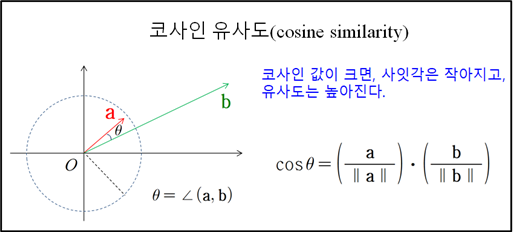

In [159]:
import requests
from io import BytesIO
from PIL import Image
import time

# 다운받을 이미지 url
url = "http://matrix.skku.ac.kr/math4AI-tools/cosine_similarity/PICA6E7.png"
# time check
start = time.time()

# request.get 요청
res = requests.get(url)

#Img open
request_get_img = Image.open(BytesIO(res.content))
request_get_img

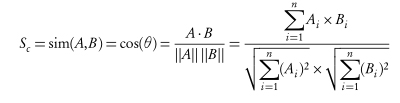

In [166]:
import requests
from io import BytesIO
from PIL import Image
import time

# 다운받을 이미지 url
url = "https://www.ibric.org/upload/geditor/201604/0.68658000_1460079065.jpg"
# time check
start = time.time()

# request.get 요청
res = requests.get(url)

#Img open
request_get_img = Image.open(BytesIO(res.content))
request_get_img

In [167]:
## 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수 작성

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = magnitude = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple) 

  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 16)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 12)	0.39624495215024286
  (1, 10)	0.3013544995034864
  (1, 8)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 14)	0.2340286519091622
  (1, 17)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3098560092999078
  (2, 4)	0.3098560092999078
  (2, 9)	0.3098560092999078
  (2, 1)	0.3098560092999078
  (2, 5)	0.3098560092999078
  (2, 11)	0.3098560092999078
  (2, 10)	0.23565348175165166
  (2, 8)	0.1830059506093466
  (2, 15)	0.3660119012186932
  (2, 14)	0.1830059506093466
  (2, 17)	0.3660119012186932
  (2, 6)	0.1830059506093466


In [169]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문자의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : ', similarity_simple)

문장 1, 문장 2 Cosine 유사도 :  0.40207758214950134


In [172]:
feature_vect_dense

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
         0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
         0.23402865, 0.39624495, 0.4680573 ],
        [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
         0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
         0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
         0.3660119 , 0.        , 0.3660119 ]])

사이킷런은 코사인 유사도를 측정하기 위해 sklearn.metrics.pairwise.cosine_similarity API 제공함

In [173]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


### 문서 유사도

In [34]:
v1 = np.array([1, 2])
v2 = np.array([2, 5])

cos_similarity(v1, v2)

0.9965457582448796

#### **호텔로 클러스터링 한 문서들의 유사도**

In [175]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'.\data\OpinosisDataset'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label 



from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair) 

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')
##### 비교 기준 문서명  comfort_honda_accord_2008  와 타 문서 유사도######
[[1.         0.83969704 0.15655631 0.33044002 0.25981841 0.16544257
  0.27569738 0.18050974 0.65502034 0.06229873]]


[[1 8 3 6 4 7 5 2 9]]
Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')


Text(0.5, 1.0, 'comfort_honda_accord_2008')

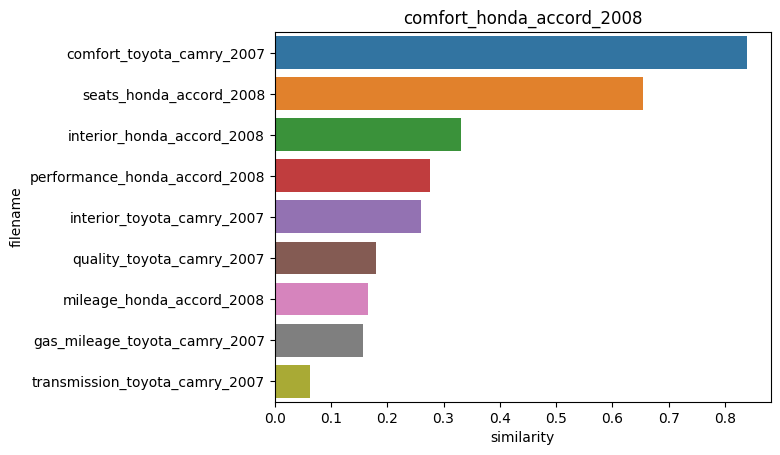

In [45]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]
print(sorted_index)

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
print(hotel_indexes)
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1,)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1,))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname) 

## 한글 KoNLPy

KoNLPy는 파이썬의 대표적인 한글 형태소 패키지임
- 형태소 분석이란 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업을 일반적으로 지칭함

- KoNLPy 설치 및 설명은 559p 참고

In [49]:
okt = Okt()

#### 데이터 로딩

In [59]:
import pandas as pd

train_df = pd.read_csv('./data/naver_movie/ratings_train.txt', sep = '\t', encoding = 'utf-8')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [48]:
from konlpy.tag import Okt

In [67]:
from konlpy.tag import Okt
okt = Okt()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = okt.morphs(text)
    return tokens_ko

In [50]:
okt.morphs("우리나라 대한민국")

['우리나라', '대한민국']

In [60]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )
train_df.drop('id', axis=1, inplace=True)

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('./data/naver_movie/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )
test_df.drop('id', axis=1, inplace=True) 

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge

In [187]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('./data/mercari_train.tsv', sep = '\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [188]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


- target 값인 price 살펴보기

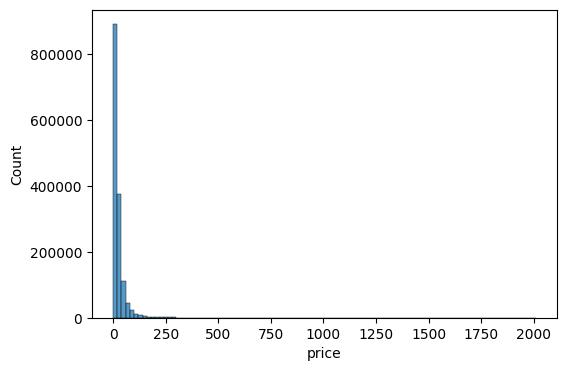

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

y_train_df = mercari_df['price']
plt.figure(figsize = (6, 4))
sns.histplot(y_train_df, bins = 100)
plt.show()

- price 값이 비교적 적은 가격을 가진 데이터 값에 왜곡돼 분포돼 있음
- 로그값 변환 후 다 살펴보기

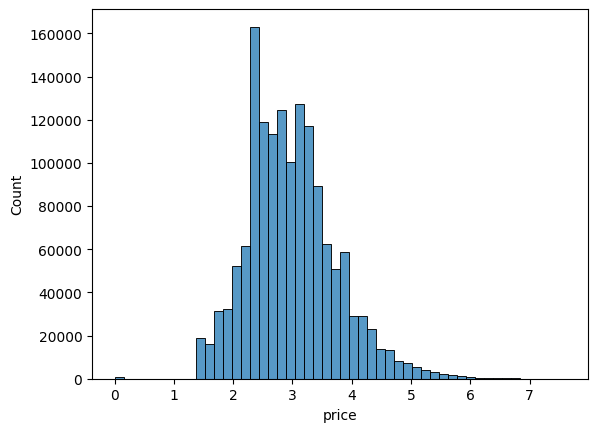

In [190]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.histplot(y_train_df, bins = 50)
plt.show()

In [191]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

- 카테고리 네임을 대/중/소분류를 나눠서 분리

In [192]:
##### apply lambda에서 호출되는 대, 중, 소 분할 함수 생성 
##### 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null', 'Other_Null', 'Other_Null']
    
# 위의 split_cat()을 apply lambda에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형:\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수 :', mercari_df['cat_jung'].nunique())
print('소분류 개수 :', mercari_df['cat_so'].nunique())

대분류 유형:
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수 : 114
소분류 개수 : 871


In [195]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value = 'Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value = 'Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value = 'Other_Null')

#### 피처 인코딩과 피처 벡터화

- brand_name : 원-핫 인코딩으로 변환
- Name : 속성은 매우 유형이 많고, 적은 단어 위주의 텍스트 형태로 돼 있으므로 Count 기반으로 피처 벡터화
- category_name : 대, 중, 소로 분리됐으므로 원-핫 인코딩
- shipping : 두 가지 유형으로 원-핫 인코딩
- item_condition_id : 5가지 유형으로 원-핫 인코딩
- item_description : 긴 텍스트이므로 TF-IDF로 변환

In [196]:
# name 속성에 대한 피처 벡터화
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range = (1, 3), stop_words = 'english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print(X_name.shape)
print(X_descp.shape)

(1482535, 105757)
(1482535, 50000)


In [198]:
from sklearn.preprocessing import LabelBinarizer

# bran_name, item_condition, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output = True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output = True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping = LabelBinarizer(sparse_output = True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output = True)
X_cat_dat = lb_cat_dae.fit_transform(mercari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output = True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output = True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

### 릿지 회귀 모델 구축 및 평가

- RMSLE를 이용해 모델 평가
- RMSLE는 RMSE에 루트를 취해 구함
- 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 억제하기 위해서 이 방식을 도입함
- RMSLE 적용 시 로그로 변환된 데이터 값 수준의 price 값을 예측할 것이므로 price log변환을 복구한 후 적용

In [200]:
def rmsle(y, y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.log1p(y) - np.log1p(y_pred), 2))

def evaluate_org_price(y_test, preds):
    # 원본 데이터는 로그로 변환되었으므로 원복 필요
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [201]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    # scipy.sparse 모듈의 hstack을 이용해 희소 행렬 결합
    X = hstack(matrix_list).tocsr()
    
    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size = 0.2, random_state = 156)
    
    # 모델 학습 및 예측
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    del X, X_train, X_test, y_train
    gc.collect()
    
    return preds, y_test

In [ ]:
# item_description 속성의 피처화 데이터가 포함되지 않을 때와 포함됐을 때의 예측 성능을 비교
linear_model = Ridge(solver = 'lsqr', fit_intercept = False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dat, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print('Without Item Description (RMSLE) :', evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dat, X_cat_jung, X_cat_so)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print('Including Item Description (RMSLE : )', evaluate_org_price(y_test, linear_preds))

- Item Description을 포함했을 때 rmsle 값이 많이 감소함 (영향이 큼을 알 수 있음)

### LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dat, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators = 200, learning_rate = 0.5, num_leaves = 125, random_state = 156)
lgbm_preds, y_test = model_train_predict(model = lgbm_model, matrix_list = sparse_matrix_list)
evaluate_org_price(y_test, lgbm_preds)